## Codio Activity 2.3: The Law of Large Numbers

**Expected Time: 45 Minutes**

**Total Points: 10**

In this activity, you will draw increasingly sized samples from a given distribution.  These samples means will be tracked, and compared to that which is known from the larger distribution.  You are to use the `scipy.stats` module and its distribution objects to produce these distributions and their samples.

## Index:

- [Problem 1](#Problem-1:-A-Uniform-Distribution)
- [Problem 2](#Problem-2:-Loop-of-Samples)
- [Problem 3](#Problem-3:-Comparing-the-sample-means-to-actual)
- [Problem 4](#Problem-4:-Distribution-of-Sample-Means)
- [Problem 5](#Problem-5:-Repeat-with-Gaussian-Distribution)


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm

[Back to top](#Index:) 

### Problem 1: A Uniform Distribution

**2 Points**


Create a uniform distribution with `loc = 5` and `scale = 10`.  Assign your results as a distribution object to `dist1` below. Done correctly, this code will produce uniformly distributed points between 5 and 15 with mean at 10.

In [39]:
### GRADED

dist1 = uniform(loc=5, scale=10)

# Answer check
print(type(dist1))
#plt.plot(np.linspace(0, 20, 1000), dist1.pdf(np.linspace(0, 20, 1000)))

<class 'scipy.stats._distn_infrastructure.rv_frozen'>


###  Problem 2: Loop of Samples

**2 Points**

Now, you are to generate samples of size 1 - 500 using `dist1`'s `.rvs` method including the `random_state = 22`.  For each sample, append the sample mean to the list `sample_means`.  

In [40]:
### GRADED

sample_means = []
sample_sizes = []

for k in range(1, 501):
    samples = dist1.rvs(size=k, random_state=22)
    sample_means.append(np.mean(samples))
    sample_sizes.append(len(samples))

    if k % 100 == 0:
        print("k: %03d mean: %5.2f std: %.2f (len(sample_means): %d)" %
              (k, sample_means[-1], np.std(samples), len(sample_means)))

#loop over values 1 - 500

    #generate samples 
    #remember the random_state
    
    #find sample mean
    
    #append mean to sample_means

# Answer check
print(len(sample_means))
print(type(sample_means))
print(sample_means[399])
print(sample_means[:5], '\n', sample_means[-5:])

k: 100 mean:  9.97 std: 2.97 (len(sample_means): 100)
k: 200 mean:  9.96 std: 2.93 (len(sample_means): 200)
k: 300 mean:  9.95 std: 2.90 (len(sample_means): 300)
k: 400 mean:  9.94 std: 2.86 (len(sample_means): 400)
k: 500 mean:  9.93 std: 2.92 (len(sample_means): 500)
500
<class 'list'>
9.942241690605716
[7.084605373588426, 8.450707995611044, 8.702265448121944, 9.924654082394818, 9.2820463731392] 
 [9.917152492762177, 9.92702320427582, 9.923037839990696, 9.921343577252099, 9.926403777871194]


### Problem 3: Comparing the sample means to actual

**2 Points**

Note that the actual mean of our data is 10.  The code below will generate a plot that compares the actual mean to the sampled means.  Do the sample means approximate the true mean with error less than .1 if the sample size is 400?  Assign your answer as a boolean value to `ans3` below -- True for yes, False for no.  Plot the results using the code below.

```python
plt.plot(range(1, 501), sample_means, label = 'sample mean', color = 'purple')
plt.axhline(10, label = 'true mean', color = 'green')
plt.xlabel('Sample Size')
plt.legend();
```

0.05775830939428417
True
<class 'numpy.bool_'>
400


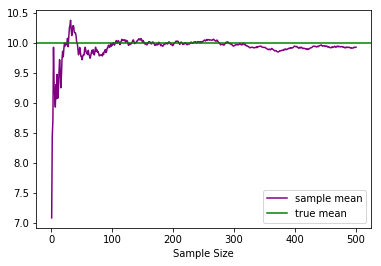

In [41]:
### GRADED

ans3 = np.abs(sample_means[399] - dist1.mean()) < 0.1

# Answer check
print(np.abs(sample_means[399] - dist1.mean()))
print(ans3)
print(type(ans3))
print(sample_sizes[399])

# Plot
plt.plot(range(1, 501), sample_means, label = 'sample mean', color = 'purple')
plt.axhline(10, label = 'true mean', color = 'green')
plt.xlabel('Sample Size')
plt.legend();

### Problem 4: Distribution of Sample Means

**2 Points**

As you notice in the plot above, there is larger variation in the small sample sizes.  As the lectures suggest, consider only those samples of size 30 or more and compute their mean and standard deviation.  Assign the samples as a list to `samples_30_or_more` below and compute the mean of these samples and thier standard deviation.  Assign the mean and deviation to `samples_mean` and `samples_std` below.  Uncomment the code to see a histogram of these sample means.  

HINT: remember that Python starts counting at 0, so using 'sample_means[30:]' is actually incorrect.

<class 'list'>
9.955489061213552
0.07692775219192274
471


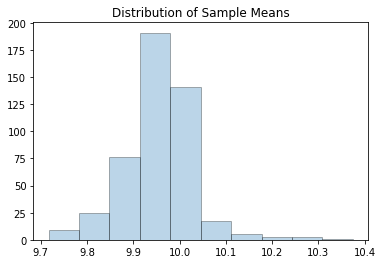

In [42]:
### GRADED

samples_30_or_more = sample_means[29:]
samples_mean = np.mean(samples_30_or_more)
samples_std = np.std(samples_30_or_more)


plt.hist(samples_30_or_more, edgecolor = 'black', alpha = 0.3)
plt.title('Distribution of Sample Means');

# Answer check
print(type(samples_30_or_more))
print(samples_mean)
print(samples_std)
print(len(samples_30_or_more))

### Problem 5: Repeat with Gaussian Distribution

**2 Points**

Now, you are to repeat the above exercise using samples from a Normal distribution centered at 5 with standard deviation 10.  Draw samples size 30 - 500 and examine their mean and deviation.  Assign the ditribution object to `gauss_dist`, the sample to the list `sample_means_gauss`, the sample mean to `gauss_mean` and standard deviation to `gauss_standard_deviation` below. Use `random_state = 22`. 

In [43]:
### GRADED

gauss_dist = norm(loc=5, scale=10)
sample_means_gauss = []

for k in range(30, 501):
    samples = gauss_dist.rvs(size=k, random_state=22)
    sample_means_gauss.append(np.mean(samples))
    if k % 100 == 0:
        print("k: %03d mean: %5.2f std: %5.2f (len(sample_means): %d)" %
              (k, sample_means_gauss[-1], np.std(samples), len(sample_means)))

gauss_mean = np.mean(sample_means_gauss)
gauss_standard_deviation = np.std(sample_means_gauss)

# Answer check
print(type(sample_means_gauss))
print(sample_means_gauss[:5], '\n', sample_means_gauss[-5:])
print(gauss_mean)
print(gauss_standard_deviation)

k: 100 mean:  4.46 std:  9.85 (len(sample_means): 500)
k: 200 mean:  6.11 std: 10.19 (len(sample_means): 500)
k: 300 mean:  5.75 std: 10.88 (len(sample_means): 500)
k: 400 mean:  5.96 std: 10.50 (len(sample_means): 500)
k: 500 mean:  5.84 std: 10.51 (len(sample_means): 500)
<class 'list'>
[5.711989769815023, 6.495208371007466, 5.670348611610735, 5.578864596890512, 5.5331440323908465] 
 [5.85212242634483, 5.842782955969858, 5.840843359217326, 5.834153785572032, 5.841178380882507]
5.568508473194311
0.5371819419572758
